# 5 - Regularizacao

## 5.1 - Regularização - Conceito
A regularização é uma técnica importante para prevenir o overfitting em modelos de aprendizado de máquina. Ela adiciona um termo de penalização à função de custo do modelo, incentivando coeficientes menores e reduzindo a complexidade do modelo. Existem diferentes formas de regularização, como o L1 (Lasso), que seleciona automaticamente características relevantes, e o L2 (RIDGE), que suaviza o ajuste do modelo. O ElasticNet combina os efeitos do L1 e L2, enquanto o LARS lida com a inclusão de mais variáveis do que observações. O Group Lasso penaliza grupos de características relacionadas. Vamos explorar o Lasso e o Ridge no código.

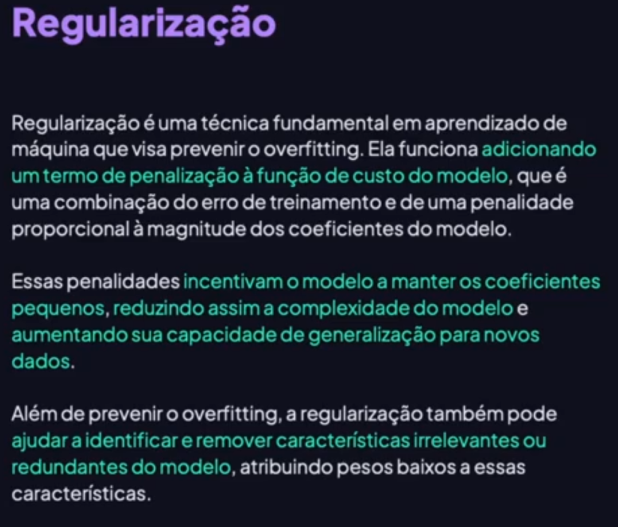

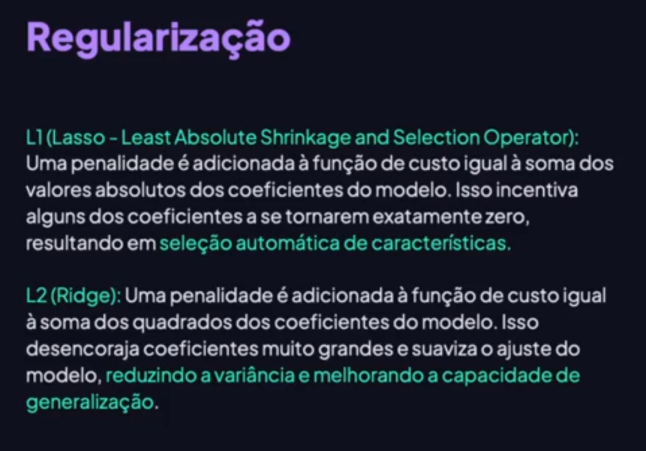

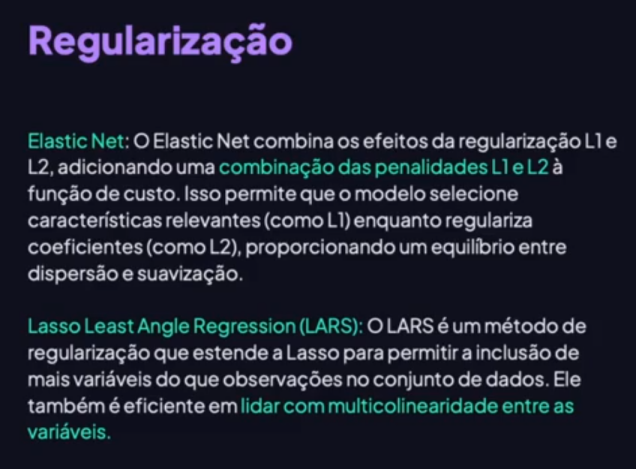

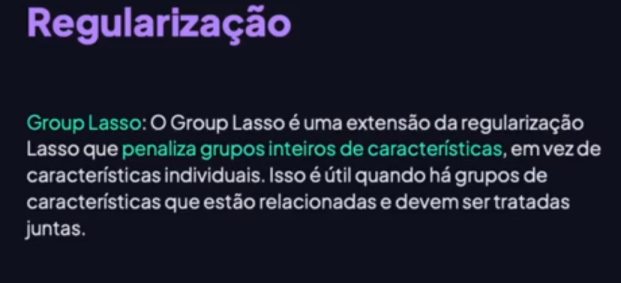

## 5.2 - Importação das Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## 5.2 - Lasso
A regularização é uma técnica importante para prevenir o overfitting em modelos de aprendizado de máquina. Ela adiciona um termo de penalização à função de custo do modelo, incentivando coeficientes menores e reduzindo a complexidade do modelo. Existem diferentes formas de regularização, como o L1 (Lasso), que seleciona automaticamente características relevantes, e o L2 (RIDGE), que suaviza o ajuste do modelo. O ElasticNet combina os efeitos do L1 e L2, enquanto o LARS lida com a inclusão de mais variáveis do que observações. O Group Lasso penaliza grupos de características relacionadas. Vamos explorar o Lasso e o Ridge no código.

In [2]:
# Carregar dataset
df = pd.read_csv('dataset_colesterol.csv')
df.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [4]:
# Tratar Nulo

# Coletar medidas das variáveis categóricas (Moda)
moda_grupo_sang = df['Grupo Sanguíneo'].mode()
moda_fumante = df['Fumante'].mode()
moda_nivel_atividade = df['Nível de Atividade'].mode()

In [5]:
# Coletar medidas das variáveis numéricas (Mediana)
mediana_idade = df.Idade.median()
mediana_peso = df.Peso.median()
mediana_altura = df.Altura.median()

In [6]:
# Imputar quando valores são ausentes
# A moda pode resultar em mais de um valor, por isso pegar a primeira que está no índice 0
df.fillna(value={'Grupo Sanguíneo': moda_grupo_sang[0],
                                'Fumante': moda_fumante[0],
                                'Nível de Atividade': moda_nivel_atividade[0],
                                'Idade': mediana_idade,
                                'Peso': mediana_peso,
                                'Altura': mediana_altura}, inplace=True)

In [8]:
# ajustar Data Frame
df.drop('Id', axis=1, inplace=True)

In [9]:
# Aplicar o OneHotEncoder
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   float64
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   float64
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(4), uint

### 5.2.1 - Treinar Modelo de Regressão com Lasso (L1)

In [11]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df.Colesterol

In [12]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [14]:
# Treinar modelo de regressão linear múltipla com Lasso
# Quanto maior o aplha, maior a penalização e mais coeficientes tenderm a ser reduzidos a 0
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [17]:
# Mostrar importância de Features
def importancia_features(modelo):
    importance = np.abs(modelo.coef_)
    print('Importância das Feartures')
    for i, feature in enumerate(modelo.feature_names_in_):
        print(f'{feature}: {importance[i]}')

In [18]:
# Importância das Features - Lasso
importancia_features(model_lasso)

Importância das Feartures
Idade: 0.021892956454610635
Peso: 2.4825937441605466
Altura: 2.196588333644872
Grupo Sanguíneo_A: 0.13835715086695366
Grupo Sanguíneo_AB: 1.0713170142143902
Grupo Sanguíneo_B: 0.5510561456671939
Grupo Sanguíneo_O: 0.02407855233079502
Fumante_Não: 1.6992076574414294
Fumante_Sim: 5.482231952353485e-15
Nível de Atividade_Alto: 1.9174226150584155
Nível de Atividade_Baixo: 0.0
Nível de Atividade_Moderado: 0.0


In [19]:
# Função para avaliar performance
def performance_regressao(modelo, X_test, y_test):
    # Faz a predição com o modelo no conjunto de testes
    y_pred = modelo.predict(X_test)

    # Avaliar o desempenho
    return mean_squared_error(y_test, y_pred, squared=False)

In [20]:
# Performance Regressão com Lasso
performance_regressao(model_lasso, X_test, y_test)

g:\Meu Drive\projects_vscode\eda\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


8.979087059280728

## 5.3 - LassoCV
Na aula de hoje, aprendemos sobre a técnica de validação cruzada para executar modelos de regressão com penalização dos coeficientes. Em vez de usar o train test split, podemos usar a função LassoCV para treinar o modelo com diferentes valores de alfa. Podemos especificar os alfas desejados, a quantidade de folds e o random state para misturar os dados. Em seguida, podemos avaliar a importância das features e a performance do modelo. Também exploramos a opção de treinar o modelo com o conjunto completo de dados, em vez de apenas o conjunto de treinamento. Essa técnica de validação cruzada é uma forma eficaz de regularizar os modelos de regressão.

### 5.3.1 - Treinar Modelo de Regressão com LassoCV

In [21]:
# Treinar com LassoCV
model_lasso_cv = LassoCV(alphas=[0.1, 0.5, 1], cv=5, random_state=51)
model_lasso_cv.fit(X_train, y_train)

LassoCV(alphas=[0.1, 0.5, 1], cv=5, random_state=51)

In [22]:
# Importância das Features - LassoCV
importancia_features(model_lasso_cv)

Importância das Feartures
Idade: 0.021892956454610635
Peso: 2.4825937441605466
Altura: 2.196588333644872
Grupo Sanguíneo_A: 0.13835715086695366
Grupo Sanguíneo_AB: 1.0713170142143902
Grupo Sanguíneo_B: 0.5510561456671939
Grupo Sanguíneo_O: 0.02407855233079502
Fumante_Não: 1.6992076574414294
Fumante_Sim: 5.482231952353485e-15
Nível de Atividade_Alto: 1.9174226150584155
Nível de Atividade_Baixo: 0.0
Nível de Atividade_Moderado: 0.0


In [23]:
# Performance Regressão com LassoCV
performance_regressao(model_lasso_cv, X_test, y_test)

g:\Meu Drive\projects_vscode\eda\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


8.979087059280728

## 5.4 - Ridge e RidgeCV
Neste vídeo, vamos explorar a regularização do tipo L2 ou Ridge. A estrutura é semelhante à regularização anterior, então podemos adaptar o modelo de treinamento para o Ridge. O Ridge não zera os coeficientes, mas aplica uma penalização na soma dos quadrados. O Alpha controla a intensidade da penalização. Vamos ajustar o modelo Ridge com um Alpha inicial de 0.1 e avaliar sua performance. O objetivo da regularização é reduzir o overfitting, mesmo que a métrica de erro não seja a melhor. Também é importante balancear a quantidade de features e controlar o overfitting. Vamos continuar com o modelo Ridge CV, que é semelhante ao Ridge, mas com validação cruzada. Avaliaremos sua performance e veremos que ele reduz a importância das features, resultando em um modelo mais simples com um erro menor. É importante encontrar o equilíbrio entre a quantidade de features, a métrica de erro e o controle do overfitting.

### 5.4.1 - Treinar Modelo de Regressão com Ridge (L2)

In [26]:
# Treinar modelo de regressão linear múltipla com Ridge
# Quanto maior o aplha, maior a penalização e mais coeficientes tenderm a ser reduzidos a 0
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [27]:
# Importância das Features - Ridge
importancia_features(model_ridge)

Importância das Feartures
Idade: 0.019414943623067244
Peso: 2.4779075943926707
Altura: 2.1937549442867046
Grupo Sanguíneo_A: 0.5416865933578069
Grupo Sanguíneo_AB: 1.4342012357744847
Grupo Sanguíneo_B: 1.2748834662357489
Grupo Sanguíneo_O: 0.38236882380883125
Fumante_Não: 1.1026122048934737
Fumante_Sim: 1.1026122048965896
Nível de Atividade_Alto: 1.6457565178560545
Nível de Atividade_Baixo: 0.6715132252698364
Nível de Atividade_Moderado: 0.9742432925997934


In [28]:
# Performance Regressão com Ridge
performance_regressao(model_ridge, X_test, y_test)

g:\Meu Drive\projects_vscode\eda\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.040142506219325

### 5.4.2 - Treinar Modelo de Regressão com RidgeCV

In [29]:
# Treinar com RidgeCV
model_ridge_cv = RidgeCV(alphas=[0.1, 0.5, 1], cv=5)
model_ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 0.5, 1], cv=5)

In [30]:
# Importância das Features - RidgeCV
importancia_features(model_ridge_cv)

Importância das Feartures
Idade: 0.01945802745682224
Peso: 2.4780485067155973
Altura: 2.193854143627682
Grupo Sanguíneo_A: 0.5404193084803735
Grupo Sanguíneo_AB: 1.4258862347712218
Grupo Sanguíneo_B: 1.2645131075681542
Grupo Sanguíneo_O: 0.37904618127644174
Fumante_Não: 1.0990280006220023
Fumante_Sim: 1.0990280006217787
Nível de Atividade_Alto: 1.6383239142326815
Nível de Atividade_Baixo: 0.6690203991850362
Nível de Atividade_Moderado: 0.9693035150499703


In [31]:
# Performance Regressão com RidgeCV
performance_regressao(model_ridge_cv, X_test, y_test)

g:\Meu Drive\projects_vscode\eda\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.039222763785668